<h3>Arbitrary value imputation</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.shape

(891, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:3],df.iloc[:,3],random_state=42,test_size=0.2)

In [6]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [7]:
X_train["Age_0"] = X_train["Age"].fillna(0)
X_train["Age_99"] = X_train["Age"].fillna(99)
X_train["Fare_0"] = X_train["Fare"].fillna(0)
X_train["Fare_99"] = X_train["Fare"].fillna(99)
X_train.head()

,Age,Fare,Family,Age_0,Age_99,Fare_0,Fare_99
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


In [8]:
# we have to check the variance now because we have filled missing values with mean and median
# If there is drastic change in variance then we have to think about it
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_0'].var())
print('Age Variance after mean imputation: ', X_train['Age_99'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_0'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_99'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  306.50456824459934
Age Variance after mean imputation:  932.9665366701432
Original Fare variable variance:  2761.0314349486343
Fare Variance after median imputation:  2672.064888561565
Fare Variance after mean imputation:  2833.708690936761


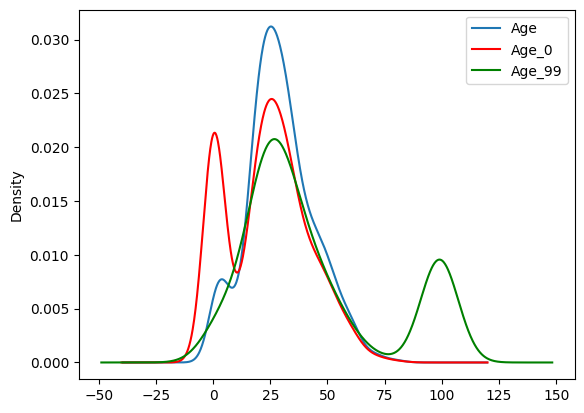

In [9]:
#we should check for distribution 
fig = plt.figure()
ax = plt.subplot(111)
# original value distribution
X_train["Age"].plot(kind="kde",ax=ax)
#mean
X_train["Age_0"].plot(kind="kde",ax=ax,color="red")
#median
X_train["Age_99"].plot(kind="kde",ax=ax,color="green")
plt.legend()

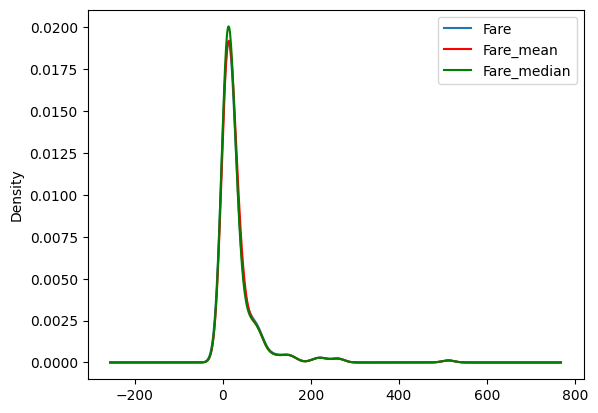

In [18]:
#we should check for distribution 
fig = plt.figure()
ax = plt.subplot(111)
# original value distribution
X_train["Fare"].plot(kind="kde",ax=ax)
#mean
X_train["Fare_mean"].plot(kind="kde",ax=ax,color="red")
#median
X_train["Fare_median"].plot(kind="kde",ax=ax,color="green")
plt.legend()

In [10]:
#we have to check for correlation and covariance
X_train.cov()

,Age,Fare,Family,Age_0,Age_99,Fare_0,Fare_99
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,69.198521,75.273024
Fare,75.481375,2761.031435,18.599163,133.308296,-111.965046,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.053631,-6.941982,17.683641,17.603852
Age_0,210.251707,133.308296,-5.053631,306.504568,-155.466410,122.151750,135.568073
Age_99,210.251707,-111.965046,-6.941982,-155.466410,932.966537,-101.290984,-116.528480
Fare_0,69.198521,2761.031435,17.683641,122.151750,-101.290984,2672.064889,2517.305934
Fare_99,75.273024,2761.031435,17.603852,135.568073,-116.528480,2517.305934,2833.708691


In [11]:
X_train.corr()

,Age,Fare,Family,Age_0,Age_99,Fare_0,Fare_99
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.085549,0.091016
Fare,0.091482,1.000000,0.207193,0.144625,-0.069365,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.171563,-0.135079,0.203323,0.196548
Age_0,1.000000,0.144625,-0.171563,1.000000,-0.290727,0.134976,0.145466
Age_99,1.000000,-0.069365,-0.135079,-0.290727,1.000000,-0.064153,-0.071667
Fare_0,0.085549,1.000000,0.203323,0.134976,-0.064153,1.000000,0.914818
Fare_99,0.091016,1.000000,0.196548,0.145466,-0.071667,0.914818,1.000000


<Axes: >

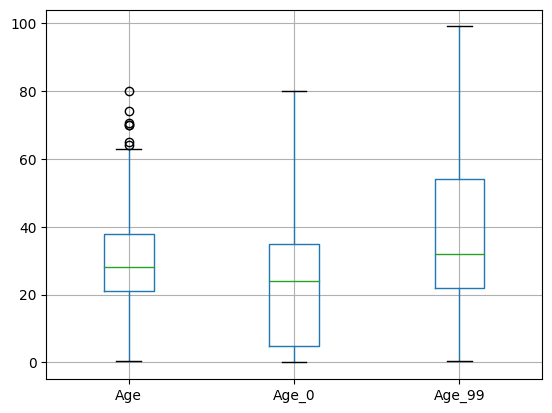

In [13]:
#at last we should see the boxplot
X_train[["Age","Age_0","Age_99"]].boxplot()

<Axes: >

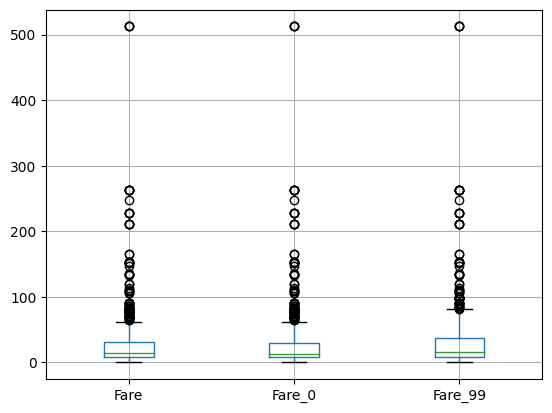

In [14]:
X_train[["Fare","Fare_0","Fare_99"]].boxplot()